# Project: Medical Appointment No Shows

**!this is a WIP!**

This is my second real project related to my Udacity's nanodegree and its purpose is only to:
- wrangling the data
- make analysis based on my questions
- draw conclusions about my findings

I choose this problem because: 
- I live in Brazil and this motivate's me 
- This problem is on Kaggle so
  - I can get inspiration in other kernel's as I'm starting in this area
  - I can publish my first kernel
  - I'm publishing as a public kernel and that point already cover the step four of the project **"Share your findings"**


## Table of Contents
<ul>
<li>
    <a href="#intro">1. Introduction</a>
    <ul>
        <li><a href="#first-impressions">1.1. First impressions</a></li>
        <li><a href="#questions">1.2. Questions</a></li>
    </ul>
</li>
<li>
    <a href="#wrangling">2. Data Wrangling</a>
    <ul>
        <li><a href="#general-properties">2.1. General Properties</a></li>
        <li><a href="#data-cleaning">2.2. Data Cleaning</a></li>
    </ul>
</li>
<li>
    <a href="#eda">3. Exploratory Data Analysis</a>
    <ul>
        <li>
            <a href="#">3.1. Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?</a>
            <ul>
                <li><a href="#">3.1.1. numerical attributes</a></li>
            </ul>
        </li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

This analysis consist in explore a dataset containing aproximately 100k medial appointments from the Brazilian public health system known as [SUS (Single Health System)](https://en.wikipedia.org/wiki/Sistema_%C3%9Anico_de_Sa%C3%BAde). We're gonna explore the [*no-show appointments dataset*](https://www.kaggle.com/joniarroba/noshowappointments) dataset using this variables:

- **PatientId:** Identification of a patient 
- **AppointmentID:** Identification of each appointment 
- **Gender:** Male or Female 
- **DataMarcacaoConsulta:** The day of the actuall appointment, when they have to visit the doctor 
- **DataAgendamento:** The day someone called or registered the appointment
- **Age:** How old is the patient 
- **Neighbourhood:** Where the appointment takes place
- [**Scholarship:**](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) True or False, indicates if the patient is in the *Bolsa Familia* program
- **Hipertension:** True or False
- **Diabetes:** True or False 
- **Alcoholism:** True or False 
- **Handcap:** True or False 
- **SMS_received:** 1 or more messages sent to the patient 
- **No-show** "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

We're aiming to find possible reasons for patient no-showing at the scheduled appointments.

In [378]:
# first let's load our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("../input/medicalappointmentnoshown/KaggleV2-May-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [379]:
# let's see from which period theese appointments are
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [380]:
# then let's see the shape of our data
df.shape

(110527, 14)

In [381]:
# and get general numeric attributes
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<div id="first-impressions"></div>
### 1.1. First impressions

First of all, we can notice that:
- We have 110k+ rows and 14 columns in this dataset (as explained on the challenge overview)
- I want to check if the patientId is duplicated since I don't know if they can have more than one appointment
- Depending on the analysis, maybe the **PatientId** and **AppointmentID** be useless for the analysis
- It's important to highlight that the **No-show** column value **Yes** means that the pacient didn't show at the appointment

Also we can already draw some assumptions:
- there are more than 100k appointments scheduled in a period of ~2 months, wow that's really impressive
- most of the patients have about 37 yeas old with almost no scholarship (9%)
- in mean 
  - 19% of the patients have hipertension
  - 7% of the patients have diabetes
  - 3% of the patients suffers from alcoholism
  - 2% of the patients are handicapped
  
I'll analyse the **"No-Show"** as my dependent variable since to me it's the most important one and it's strongly related to what we want to discover here.

And I'll use all dataset variables in my analysis, I just want to check on the **Data wrangling** stage if we really need the:
- Patient id
- Appointment id
- Neighbourhood

Since it look's like this variables are not that important for this analysis.

<div id="questions"></div>
### 1.2. Questions

The main questions I want to answer are:
- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?
- There are any relation on these variables that can lead us to a more specific group of patients?
- The day of the week of the appointment influences the patient no showing?
- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
- There are patients no showing in appointments on the same day?

<a id='wrangling'></a>
## 2. Data Wrangling

In this section the data will be analysed and cleaned, dealing with missing values or weird values.
Also we're gonna explore in a deeper lever in a way that maybe we can formulate more questions.

<div id="general-properties"></div>
### 2.1. General Properties

Here we're gonna explore our dataset properties checking for:
- What kind of variables we need to:
  - convert the data type
  - drop from the dataset
- Checking duplicates
- Checking weird values (outliers)
- Gather more information about a specific variable
- Check if we need to create more columns with usefull data for the exploration

In [382]:
# checking column information for missing values and strange types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [383]:
# checking for general data duplicates
df.duplicated().sum(), df.PatientId.duplicated().sum(), df.AppointmentID.duplicated().sum()

(0, 48228, 0)

In [384]:
# checking all possible values on some columns
print(df.Gender.unique())
print(sorted(df.Age.unique()))
print(sorted(df.Neighbourhood.unique()))
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())
print(df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

It looks like we have a good dataset: 
- no missing lines 
- we discover that indeed we need the **Patient ID** since it seems some patients try to make new appointments
- there are no weird values on most columns

But we'll need to do some cleaning here:
- we need to fix some data typings
  - ScheduledDay and AppointmentDay makes sense to be a date/datetime type
  - No-Show makes sense to be a boolean
  - PatientId makes sense to be converted as string to prevent from being applied as a numerical operation since it represents the patient identification
- **Appointment ID** seems to not be usefull for this analysis
- **Handcap** variable have values beyond True and False, and we can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699#229356) that this occurs because the handcap field represents the number of patient disabilities

And we can also make more questions:
- On the problem summary they don't mention on which neighbourhood we're analysing, I've thought that we're analysing data from several cities from Brazil, but it seams that we're seing a specific region
  - We can see [here](https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#) that this dataset contains appointments from *Vitória - ES* in Brazil and this turns out to be even more impressive that there are more than 100k schedulled in a ~2 month period in 2016
  
Now we can analyse also the neighbourhood data.

<div id="data-cleaning"></div>
### 2.2. Data Cleaning

Here we're need to:
- remove useless columns
- rename the columns to use easier names during the exploration while fixing typos
- format patient id column to string
- format all date related columns to the correct type
- format the No-Show column with `0 = No` and `1 = Yes`
- remove the weird age value that is less than zero
- format the handicap field correctly, since we only want to know if the patient is handicap and not how many disabilities they have
- add new columns
  - appointment_week_day: to show what day of the week the appointment was scheduled
  - appointment_waiting_time: waiting time to the appointment

In [385]:
# let's remove some useless columns
# I think the appointmentID is useless for this analysis
df.drop(['AppointmentID'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [386]:
# renaming all columns to simpler names for our exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handicap', 'received_sms', 'no_show'],
      dtype='object')

In [387]:
# formatting the patient_id column as string
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))

In [388]:
# formatting the date time 'scheduled_day' and 'appointment_day' columns
# i'm just testing different forms of time conversion here
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = df.appointment_day.apply(np.datetime64)

df.scheduled_day.head(1), df.appointment_day.head(1)

(0   2016-04-29 18:38:08
 Name: scheduled_day, dtype: datetime64[ns], 0   2016-04-29
 Name: appointment_day, dtype: datetime64[ns])

In [389]:
# formatting the 'no_show' column with int type containing 0 for No and 1 for Yes
df.no_show = df.no_show.map({ 'No': 0, 'Yes': 1 })

df.no_show.unique()

array([0, 1])

In [390]:
# discart the ages bellow zero
df = df.query('age >= 0')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [391]:
# remove the weird values from handcap variable
df.loc[df.handicap > 1, 'handicap'] = 1
df.handicap.unique()

array([0, 1])

In [392]:
# creating the first column "appointment_week_day"
df['appointment_week_day'] = df.appointment_day.map(lambda day: day.day_name())
df.appointment_week_day.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: appointment_week_day, dtype: object

In [393]:
# creating the second column "appointment_waiting_time"
df["appointment_waiting_days"] = df.appointment_day - df.scheduled_day
df.appointment_waiting_days.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: appointment_waiting_days, dtype: timedelta64[ns]

In [394]:
# well it seams that some are treated on the same day that they scheduled
# we can prevent that weird value by calculating the the "absolute value" of this column
# and then converting the "time" to "days"
df.appointment_waiting_days = df.appointment_waiting_days.abs().dt.days
df.appointment_waiting_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: appointment_waiting_days, dtype: int64

In [395]:
# let's see how our data looks like after all cleanning
df.head(5)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,appointment_week_day,appointment_waiting_days
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,0
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0


It seams we have all the data we need to start exploring and answer the questions.

<a id='eda'></a>
## 3. Exploratory Data Analysis

First, let's review all questions that I want to answer:

- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?
- There are any relation on these variables that can lead us to a more specific group of patients?
- The day of the week of the appointment influences the patient no showing?
- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
- There are patients no showing in appointments on the same day?

Let's:
- analyse our data
- mix them up
- get assumptions along the way
- answer our questions

In [396]:
# first let's re-see our dataset description
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,appointment_waiting_days
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934,9.532915
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445,15.027724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


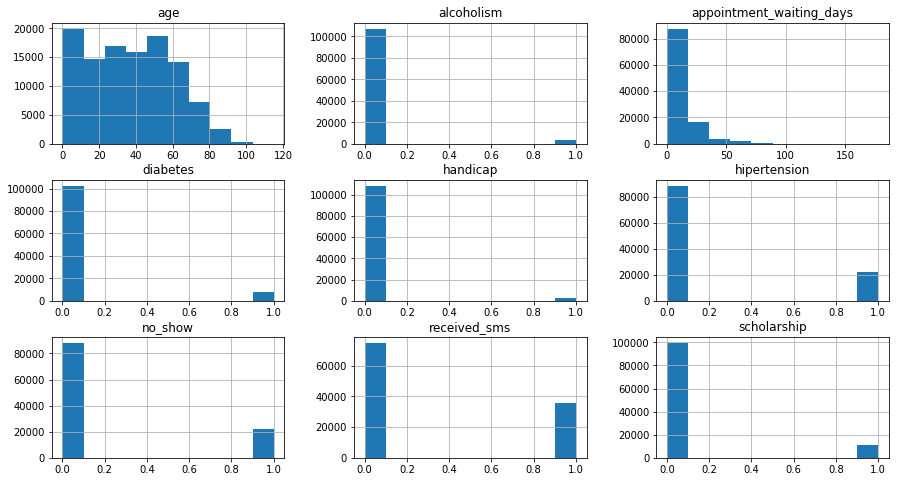

In [397]:
# and plot basic histogram charts
df.hist(figsize=(15, 8));

- most of the patients 
  - are bellow 60 years old
  - doesn't suffer from alcoholism/diabetes/hipertension
  - are not handicapped
  - doesn't received a reminder sms
  - aren't in the "Bolsa familia" program
  - doesn't missed the appointment

I think in this case the age is the most relevant variable that we can analyse, since it's the only one that have a better distribution between the amount of patients.

Also we can check out the **appointment_waiting_days** since it's one of the most relevant variables that we can mix up and the **received_sms** since it is a 75 percentile and is the variable that have the most difference between the other boolean variables.

I'll se this variables one by one a mix them up with our categorical variables:
- appointment_week_day
- gender
- neighbourhood
- patient_id

In [398]:
def show_attribute_statistics(dataframe, attribute, sorter = False):
    '''Prints basic statistics from the attribute also plotting the basic chart. 
    Syntax: show_attribute_statistics(dataframe, attribute), where:
        dataframe = the current dataframe;
        attribute = the string representing the attribute;
        sorter = array representing the sort reindex;
    '''
    
    # grouping by the patients by attribute and see if there is any interesting data related to their no showing
    no_show_group_by_attribute = dataframe.groupby([attribute, 'no_show']).count().patient_id.unstack().reindex(sorter) if sorter else dataframe.groupby([attribute, 'no_show']).count().patient_id.unstack()
    print("Analysing %s attribute" % attribute)
    print(no_show_group_by_attribute.describe())
    
    # replacing all none values with zero, since it's the count of patients on that categorie
    no_show_group_by_attribute.fillna(value=0, inplace=True)
    
    # let's also record the rate of no-showing base on the attribute
    no_show_group_by_attribute["no_show_rate"] = (no_show_group_by_attribute[1].values / no_show_group_by_attribute[0].values)
    no_show_group_by_attribute.no_show_rate.fillna(value=0, inplace=True)
    no_show_group_by_attribute["no_show_rate_value"] = no_show_group_by_attribute["no_show_rate"] * (no_show_group_by_attribute[0] + no_show_group_by_attribute[1])
    no_show_group_by_attribute.no_show_rate_value.fillna(value=0, inplace=True)

    # plotting our data
    plt.figure(figsize=(30, 10))

    # line chart
    plt.plot(no_show_group_by_attribute.no_show_rate_value.values, color="r")

    # bar chart
    plt.bar(no_show_group_by_attribute.index, no_show_group_by_attribute[0].values)
    plt.bar(no_show_group_by_attribute.index, no_show_group_by_attribute[1].values)

    # configs
    plt.xlabel(attribute)
    plt.ylabel("amount of patients")
    plt.legend(["not attended rate", "attended", "not attended"])

    plt.title("amount of patient by no show appointment groupped by %s" % attribute)

    plt.show();

### 3.1. Age

Analysing age attribute
no_show            0           1
count     103.000000  100.000000
mean      856.378641  223.190000
std       498.138813  131.591017
min         1.000000    1.000000
25%       457.500000   90.500000
50%      1025.000000  269.500000
75%      1171.500000  320.000000
max      2900.000000  639.000000


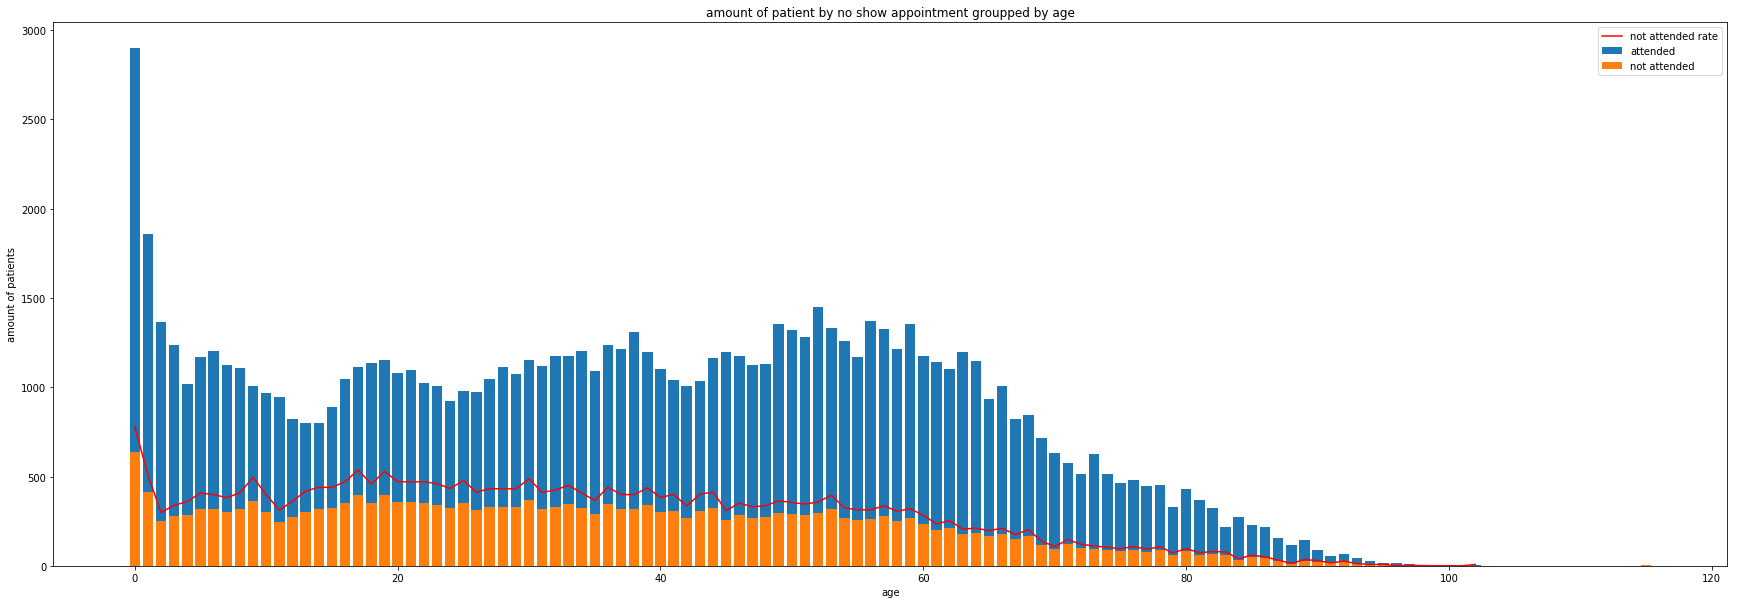

In [399]:
show_attribute_statistics(df, "age")

Through the chart above, it becomes evident that the **no-showing rate decreases as older the person is**.

It reaches higher rates when the patient is a baby/child maybe because:
- parents or guardians may have difficulties bringing the child to the appointment
- or maybe because there was a long wait until the attendance (but we'll se more about that later)

### 3.2. Waiting days

Analysing appointment_waiting_days attribute
no_show             0           1
count      123.000000   110.00000
mean       717.130081   202.90000
std       3738.285736   391.90169
min          1.000000     1.00000
25%          7.000000     8.25000
50%         61.000000    35.50000
75%        447.000000   268.25000
max      40870.000000  2905.00000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


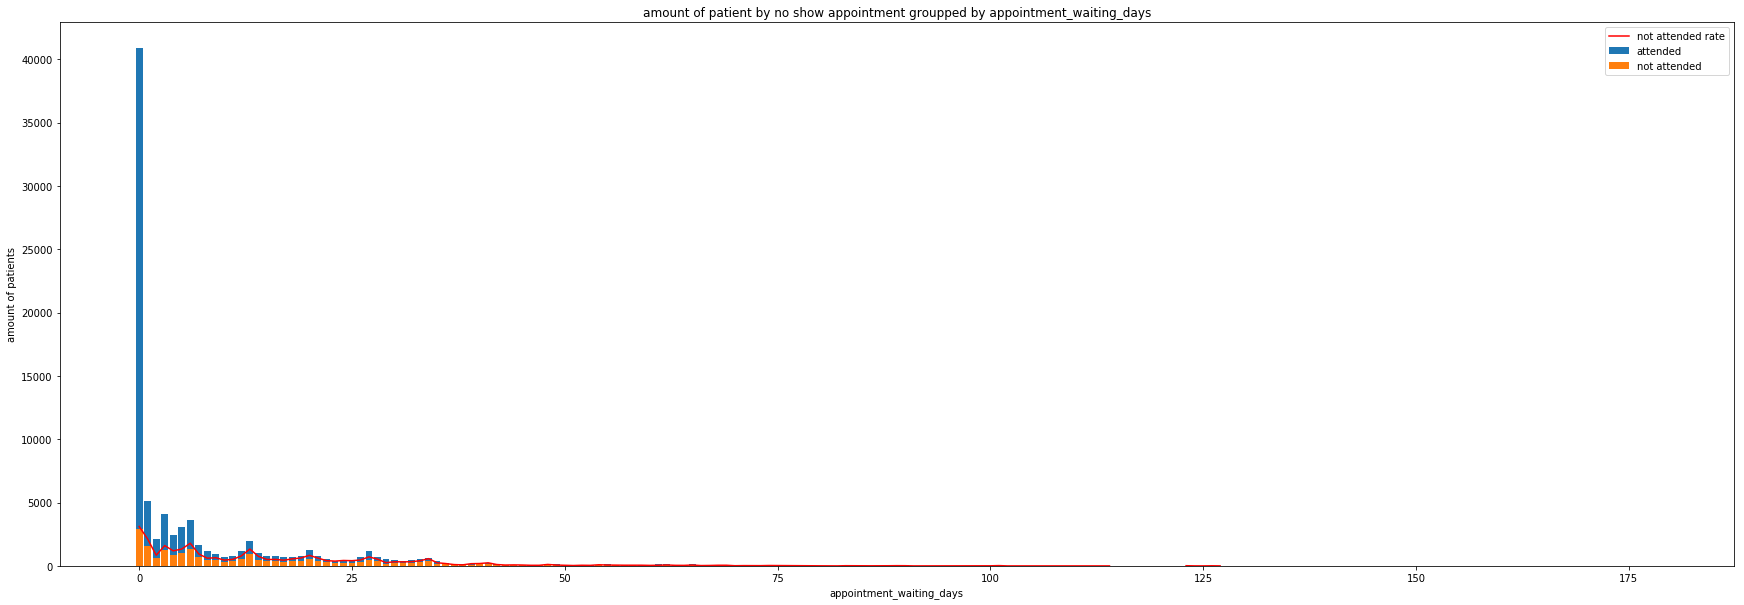

In [400]:
show_attribute_statistics(df, "appointment_waiting_days")

In the age case, maybe it's nicer if we can group that data, since we have a large amount of distribution between the points.

So I'll group by used by [tsilveira](https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis) on his kernel and using the cut method explained on [this article](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

So I'll categorize the data in these groups:

| waiting time | days |
| -- | -- |
| same day | 0 |
| week | 1 - 7 |
| month | 8 - 30 |
| quarter | 31 - 90 |
| semester | 91 - 180 |
| a lot of time | > 180 |

Analysing waiting_days_categories attribute
no_show             0            1
count        5.000000     5.000000
mean     17641.400000  4463.800000
std      15761.258049  3583.242624
min        117.000000    44.000000
25%       6384.000000  2905.000000
50%      18861.000000  3161.000000
75%      21975.000000  7334.000000
max      40870.000000  8875.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


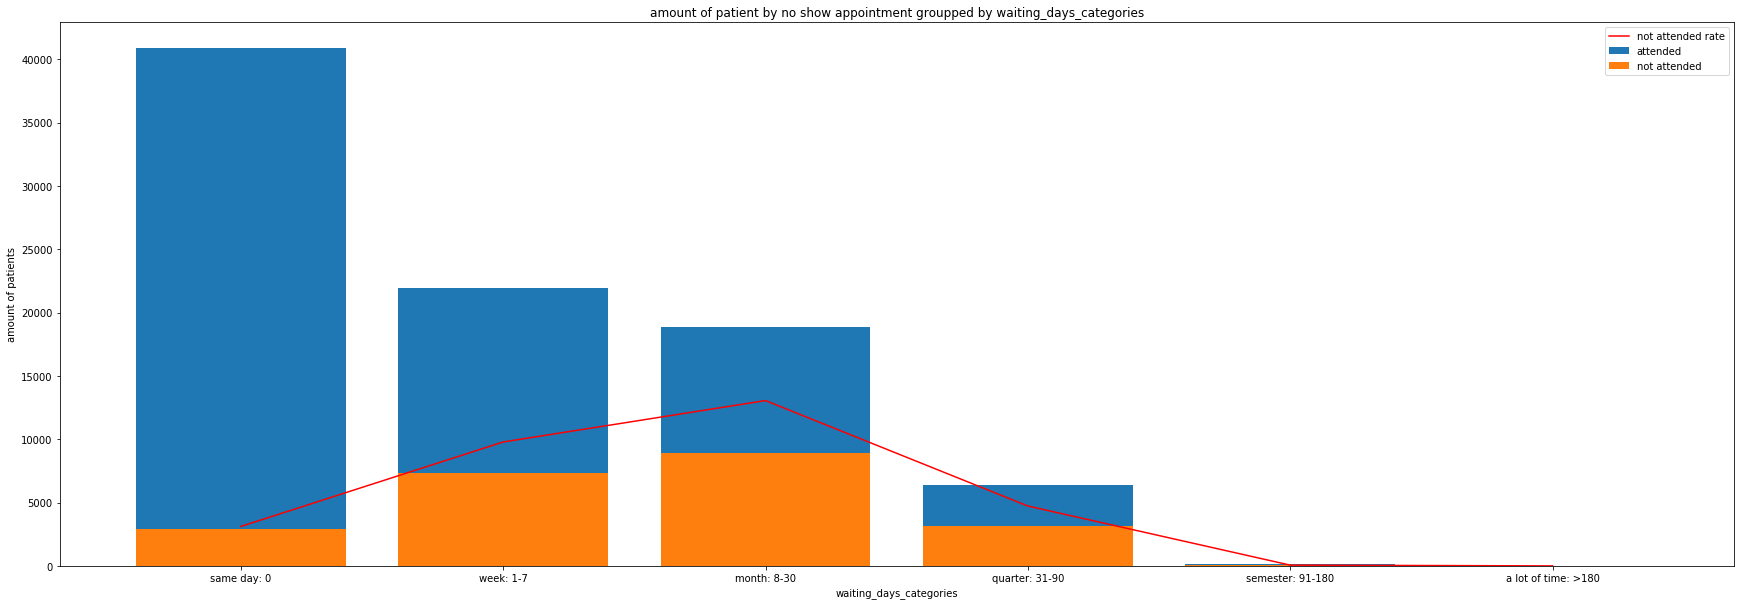

In [401]:
categories = pd.Series(['same day: 0', 'week: 1-7', 'month: 8-30', 'quarter: 31-90', 'semester: 91-180', 'a lot of time: >180'])
df['waiting_days_categories'] = pd.cut(df.appointment_waiting_days, bins = [-1, 0, 7, 30, 90, 180, 500], labels=categories)
show_attribute_statistics(df, "waiting_days_categories")

Through the chart above, it becomes evident that the **no-showing rate increases as times goes by until it reach a month**.

It reaches lower rates when the patient is attended on the same day that this may happen depending on the urgency or even if they go to the health center withou any scheduling.

One interesting thing is the fact of the rate drastically decreases after a month of waiting time.

We can get the group of patients that are attended on the same day and analyse it's differences from patients from other groups.

#### 3.2.1. Analysing the decrease after a month

Just to see what's de difference between the semester group from others, let's split our data in groups:
- Attended on 
  - same day
  - between a week and a month
  - quarter
  - after a quarter (90 days)

In [402]:
# splitting data in groups
same_day_category = df[df.waiting_days_categories == categories[0]]
short_period_category = df.query(f"waiting_days_categories in ['{categories[1]}', '{categories[2]}']")
quarter_category = df[df.waiting_days_categories == categories[3]]
long_period_category = df[df.appointment_waiting_days > 90]

same_day_category.waiting_days_categories.unique(), short_period_category.waiting_days_categories.unique(), quarter_category.waiting_days_categories.unique(),  long_period_category.waiting_days_categories.unique()

([same day: 0]
 Categories (1, object): [same day: 0], [week: 1-7, month: 8-30]
 Categories (2, object): [week: 1-7 < month: 8-30], [quarter: 31-90]
 Categories (1, object): [quarter: 31-90], [semester: 91-180]
 Categories (1, object): [semester: 91-180])

In [403]:
print("Same day \n", same_day_category.mean(numeric_only=True))
print("\n")
print("Short period \n", short_period_category.mean(numeric_only=True))
print("\n")
print("Quarter \n", quarter_category.mean(numeric_only=True))
print("\n")
print("Long period \n", long_period_category.mean(numeric_only=True))

Same day 
 age                         35.104192
scholarship                  0.104786
hipertension                 0.183986
diabetes                     0.070588
alcoholism                   0.038584
handicap                     0.024078
received_sms                 0.000000
no_show                      0.066362
appointment_waiting_days     0.000000
dtype: float64


Short period 
 age                         38.412464
scholarship                  0.098887
hipertension                 0.213603
diabetes                     0.076413
alcoholism                   0.026505
handicap                     0.018617
received_sms                 0.515751
no_show                      0.284144
appointment_waiting_days    10.494767
dtype: float64


Quarter 
 age                         37.924987
scholarship                  0.065060
hipertension                 0.153903
diabetes                     0.049240
alcoholism                   0.016344
handicap                     0.011629
received_sms      

Based on the findings above we can see the differences between the groups:

|              | Attended on the same day | Attended in a short period (week - month) | Attended in a period of 31-90 days (quarter) | Attended in a long period (> 90 days) |
| ------------ | ------------------------ | ----------------------------------------- | -------------------------------------------- | ------------------------------------- |
| Average age  | 35 years                 | 38 years                                  | 37 years                                     | **58 years**                          |
| Scholarship  | **~10%**                 | ~9%                                       | ~6%                                          | ~7%                                   |
| Hipertension | ~18%                     | ~21%                                      | ~15%                                         | **~57%**                              |
| Diabetes     | ~7%                      | 7%~                                       | ~4%                                          | **~14%**                              |

From this analysis we can conclude that the drastic drop on the no-show rating from the period longer than a quarter probably is **due to being an older public** who require regular medical follow-up and tend to schedule more appointments.

### 3.3. Received sms

Analysing received_sms attribute
no_show             0             1
count        2.000000      2.000000
mean     44103.500000  11159.500000
std      26029.307722   1945.250755
min      25698.000000   9784.000000
25%      34900.750000  10471.750000
50%      44103.500000  11159.500000
75%      53306.250000  11847.250000
max      62509.000000  12535.000000


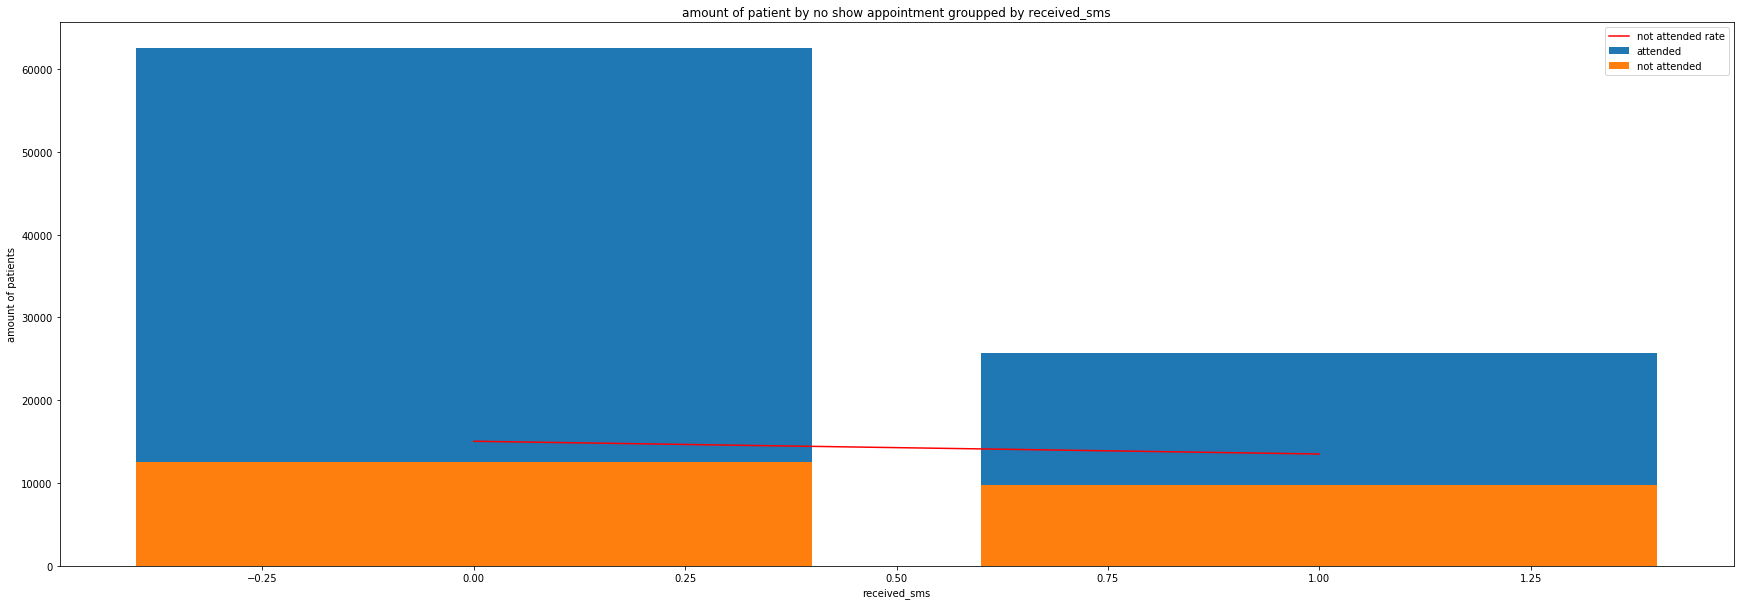

In [404]:
show_attribute_statistics(df, "received_sms")

It's a little hard to see here, but the sms reminder acctually influences the no-showing of the patient, but it doesn't have a strong impact on that.

We can normalize to see if can get a better difference.

In [405]:
df_sms_normalized = df.groupby(['received_sms', 'no_show']).count().patient_id.unstack()
df_sms_normalized.head()

(df_sms_normalized - df_sms_normalized.mean())  / (df_sms_normalized.max() - df_sms_normalized.min())

no_show,0,1
received_sms,,
0,0.5,0.5
1,-0.5,-0.5


Well, we don't have a greater difference, so this attribute may not be that relevant to conclude something about this data.

We can continue through the variables:
- appointment_week_day
- gender
- neighbourhood
- patient_id

Investigating it's relations with no-show.

### 3.4. Appointment week day

Analysing appointment_week_day attribute
no_show             0            1
count        6.000000     6.000000
mean     14701.166667  3719.833333
std       7711.776615  1943.943766
min         30.000000     9.000000
25%      14177.250000  3512.750000
50%      16503.000000  4363.500000
75%      19872.000000  4992.250000
max      20774.000000  5152.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


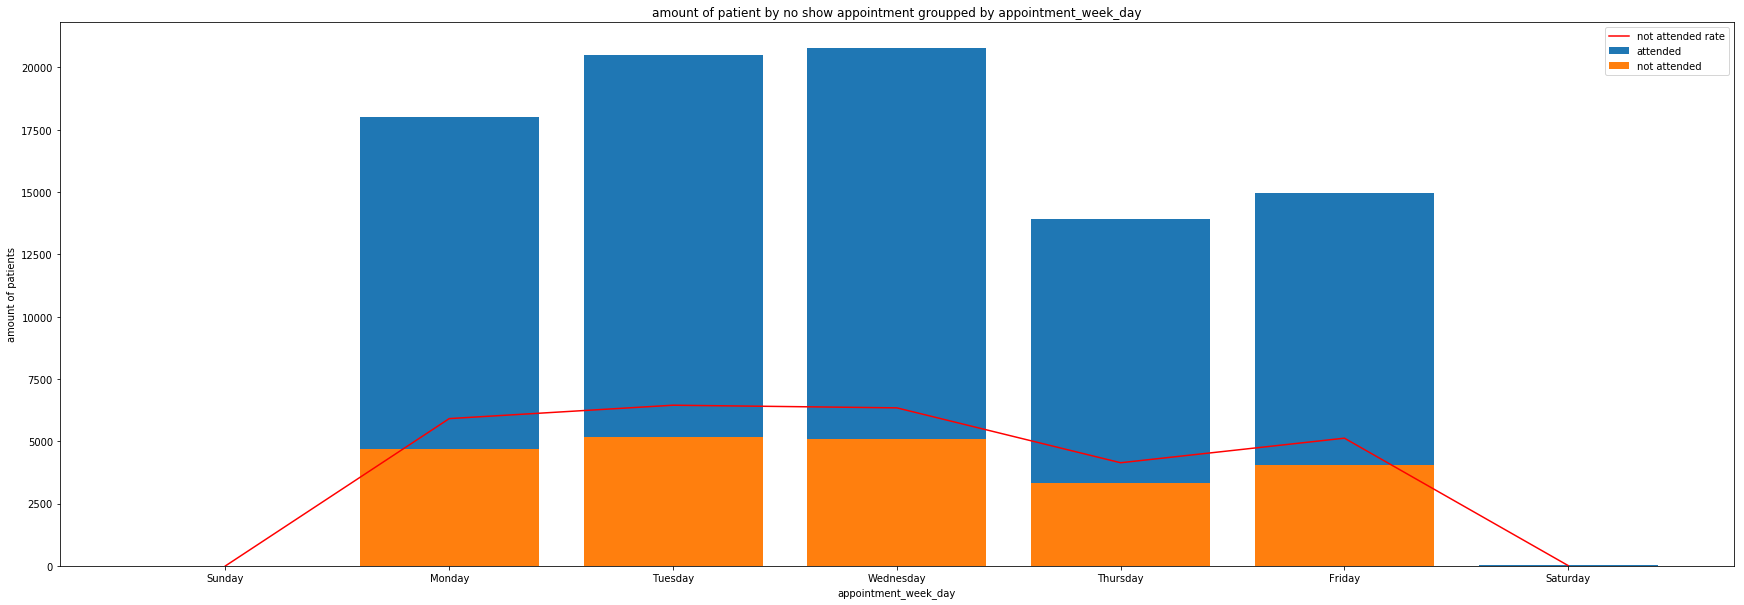

In [406]:
show_attribute_statistics(df, "appointment_week_day", ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])


Through the chart above, we can see that the **no-showing rate increases during the week as soon as it starts**, and **when it's getting closer to the weekend the rate drop consistently**.

It reaches lower rates when the patient is attended on thursdays but most of the time, the data is consistent between week days.

### 3.5. Gender

Analysing gender attribute
no_show            0            1
count        2.00000      2.00000
mean     44103.50000  11159.50000
std      18584.88753   4857.11648
min      30962.00000   7725.00000
25%      37532.75000   9442.25000
50%      44103.50000  11159.50000
75%      50674.25000  12876.75000
max      57245.00000  14594.00000


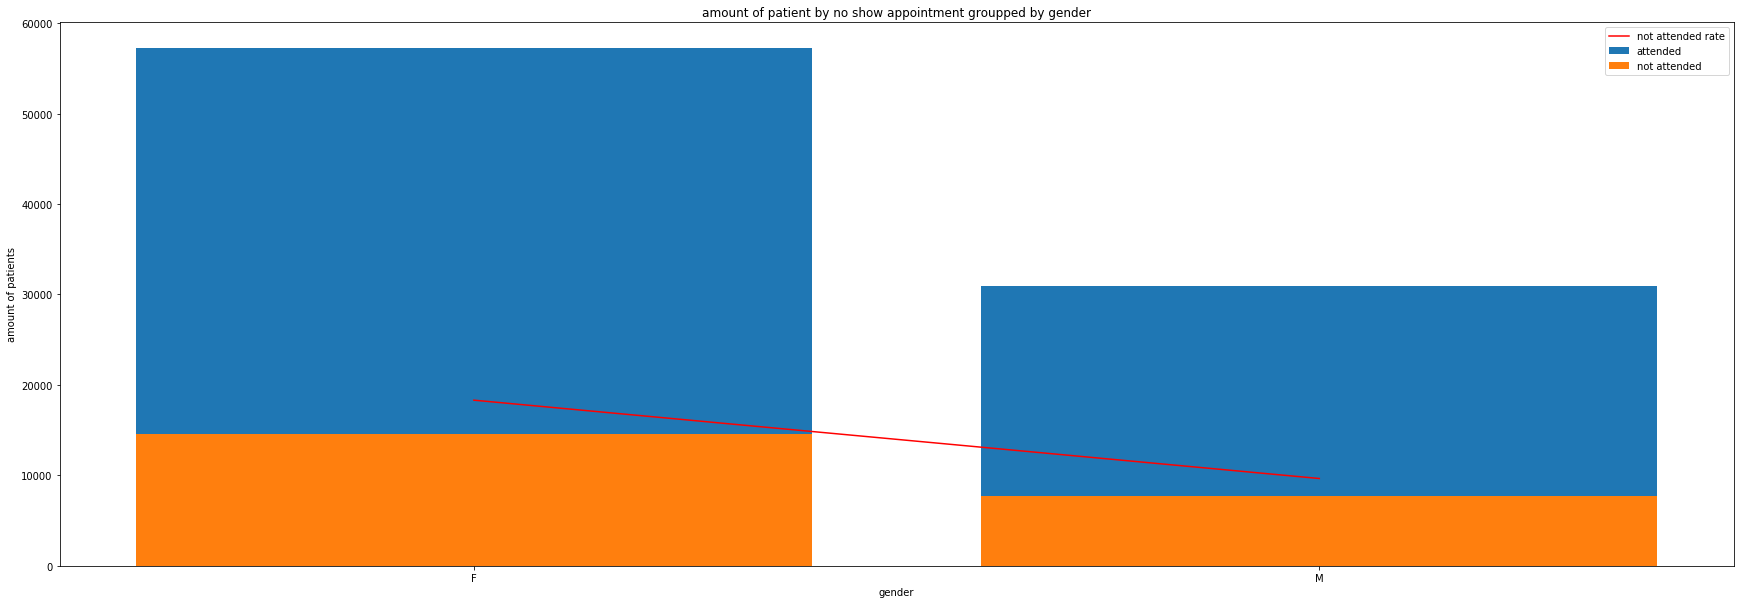

In [407]:
show_attribute_statistics(df, "gender")

Through the chart above, we can see that we have a large amount of female patients.

We can assume that in this context that women tend to care more about their health than man due to the massive difference from the consultants as we can see [here](https://www.everydayhealth.com/columns/health-answers/why-men-dont-go-to-the-doctor/) and the rate of no-showing rate of men is smaller than women.

Let's just double check if the proportion of woman not attending is really greater than men.

In [408]:
df_groupped_by_gender = df.groupby(["gender", 'no_show']).count().patient_id

woman_no_show_proportion = (df_groupped_by_gender.F[1] * 100) / df_groupped_by_gender.F.sum()
men_no_show_proportion = (df_groupped_by_gender.M[1] * 100) / df_groupped_by_gender.M.sum()

woman_no_show_proportion, men_no_show_proportion

(20.314870752655242, 19.967947889471915)

Despite the chart is thicking to let us think men no-show rate is less than woman because of the greater amount of difference between the amount of data distributed between the groups. 

Calculating their proportions acctualy this difference is only by **~0.5%**.

This isn't a strong difference, so woman and men have a similar no-showing proportion.

### 3.6. Neighbourhood

Analysing neighbourhood attribute
no_show           0            1
count      80.00000    80.000000
mean     1102.58750   278.987500
std      1096.25939   278.000751
min         1.00000     1.000000
25%       324.00000    75.000000
50%       709.50000   184.500000
75%      1605.00000   428.250000
max      6252.00000  1465.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


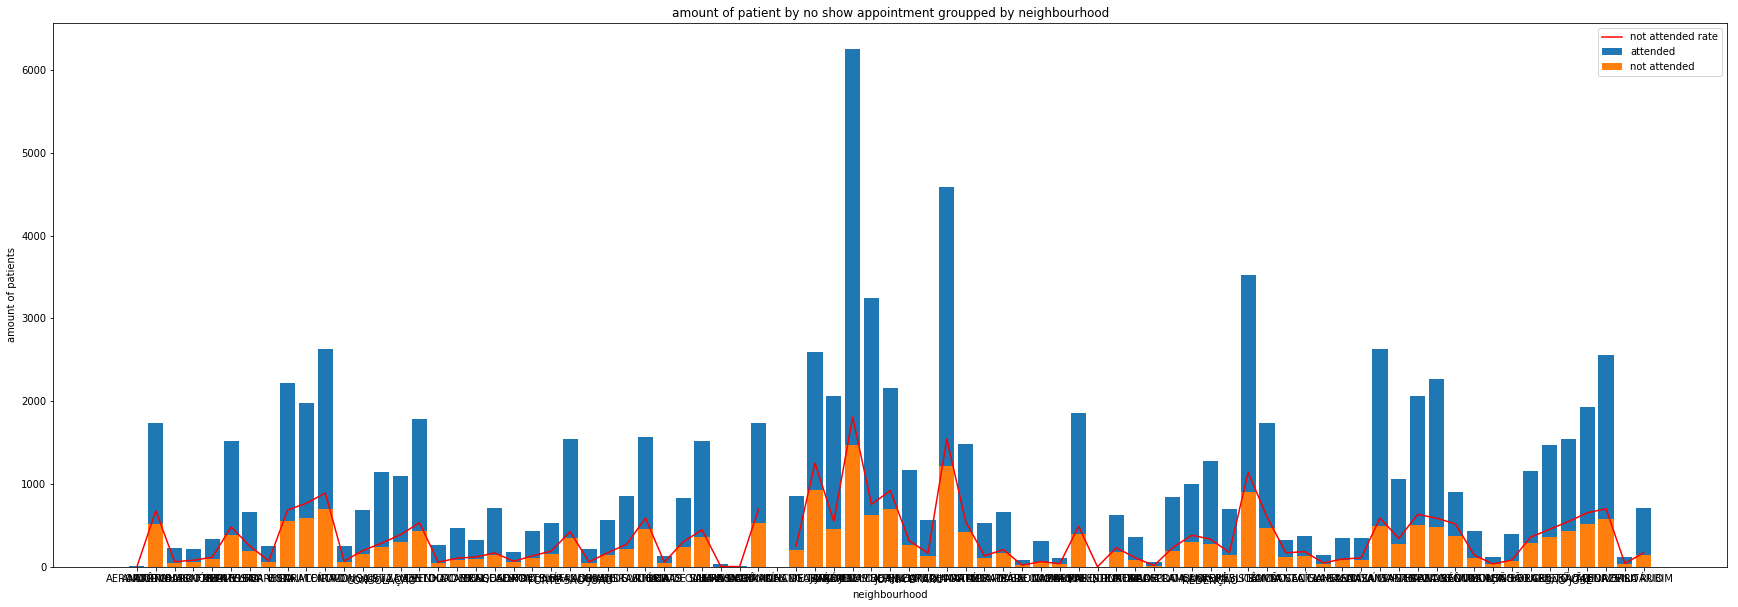

In [409]:
show_attribute_statistics(df, "neighbourhood")

Well, we can't see too well our data, let's plot a better chart

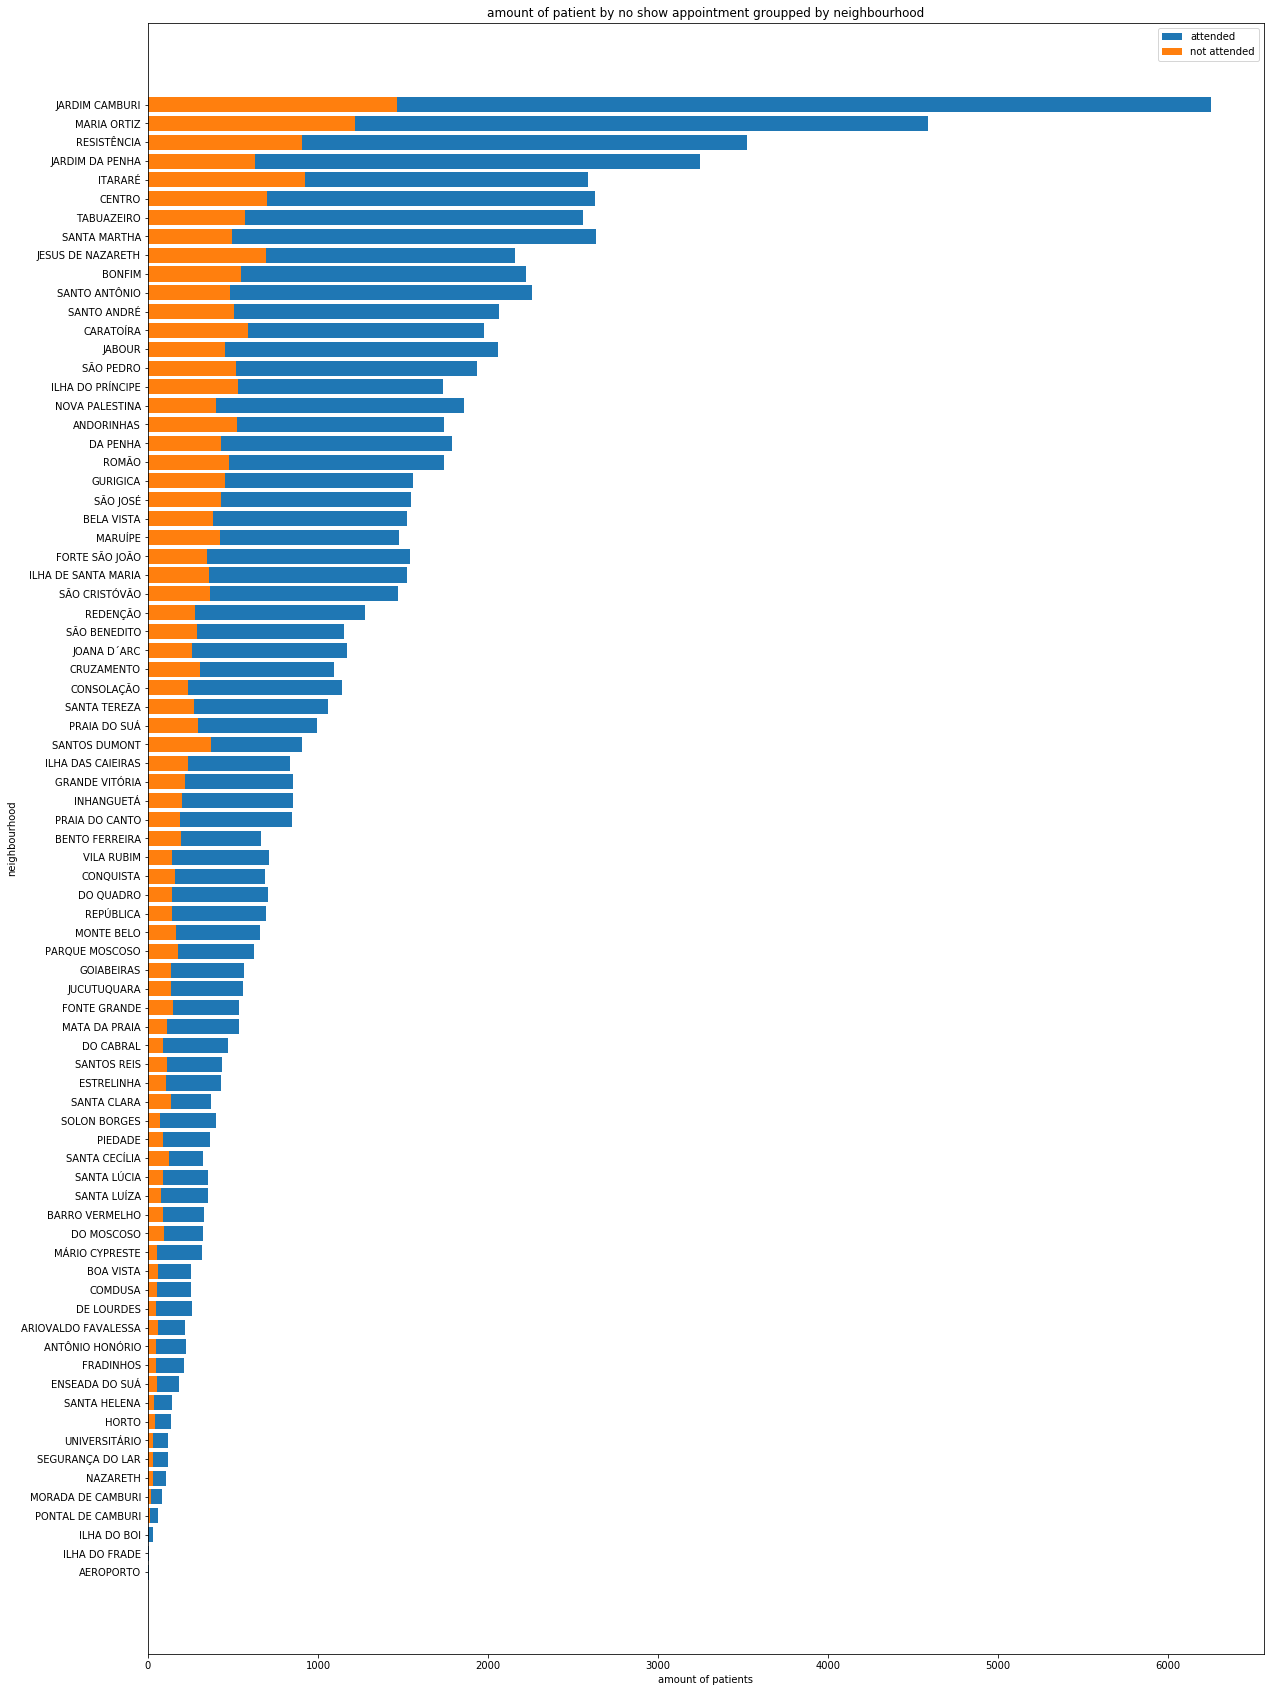

In [410]:
df_groupped_by_neighborhood = df.groupby(['neighbourhood', 'no_show']).count().unstack().patient_id
df_groupped_by_neighborhood["sum"] = df_groupped_by_neighborhood[0] + df_groupped_by_neighborhood[1]
df_groupped_by_neighborhood.sort_values(by="sum", inplace=True)
df_groupped_by_neighborhood.dropna(inplace=True)


# plotting our data
plt.figure(figsize=(20, 30))

# bar chart
plt.barh(df_groupped_by_neighborhood.index, df_groupped_by_neighborhood[0].values)
plt.barh(df_groupped_by_neighborhood.index, df_groupped_by_neighborhood[1].values)

# configs
plt.xlabel("amount of patients")
plt.ylabel("neighbourhood")
plt.legend(["attended", "not attended"])

plt.title("amount of patient by no show appointment groupped by neighbourhood")

plt.show();

As we can see, the **Jardim Camburi** is the one with most of the appointments in the state.

**Jardim Camburi** is the [most populous neighbourhood from "Espírito Santo"](https://pt.wikipedia.org/wiki/Jardim_Camburi)

Just to finish our analysis about the neighbourhood, let's check out its relation with the no-show attribute.

In [411]:
# getting all neighbourhoods data from patients that no-showed groupped by waiting days categories
df_no_shows_by_neighbourhood_waiting_days_categories = df.query('no_show == 1').groupby(['neighbourhood', 'waiting_days_categories']).count().patient_id.fillna(value=0).unstack()
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.0,0.0,1.0,0.0,0.0,0.0
ANDORINHAS,54.0,193.0,229.0,45.0,0.0,0.0
ANTÔNIO HONÓRIO,7.0,8.0,30.0,5.0,0.0,0.0
ARIOVALDO FAVALESSA,10.0,24.0,27.0,1.0,0.0,0.0
BARRO VERMELHO,15.0,27.0,46.0,3.0,0.0,0.0


For this analysis, we want to check out the relation between the neighbourhood and waiting days categorie group.

In order to do that maybe it's best if we use a [heatmap](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py), since we can compare the values between two categories

Also it's nice to normalize all data

In [412]:
# normalizing values from the dataframe you can check out the method for this here: https://stackoverflow.com/a/31480994
df_no_shows_by_neighbourhood_waiting_days_categories = df_no_shows_by_neighbourhood_waiting_days_categories.div(df_no_shows_by_neighbourhood_waiting_days_categories.sum(axis=1), axis=0)
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.000000,0.000000,1.000000,0.000000,0.0,0.0
ANDORINHAS,0.103647,0.370441,0.439539,0.086372,0.0,0.0
ANTÔNIO HONÓRIO,0.140000,0.160000,0.600000,0.100000,0.0,0.0
ARIOVALDO FAVALESSA,0.161290,0.387097,0.435484,0.016129,0.0,0.0
BARRO VERMELHO,0.164835,0.296703,0.505495,0.032967,0.0,0.0


In [413]:
# converting the normalized values to percentage
df_no_shows_by_neighbourhood_waiting_days_categories = (df_no_shows_by_neighbourhood_waiting_days_categories * 100).round(2)
df_no_shows_by_neighbourhood_waiting_days_categories.head()

waiting_days_categories,same day: 0,week: 1-7,month: 8-30,quarter: 31-90,semester: 91-180,a lot of time: >180
neighbourhood,,,,,,
AEROPORTO,0.00,0.00,100.00,0.00,0.0,0.0
ANDORINHAS,10.36,37.04,43.95,8.64,0.0,0.0
ANTÔNIO HONÓRIO,14.00,16.00,60.00,10.00,0.0,0.0
ARIOVALDO FAVALESSA,16.13,38.71,43.55,1.61,0.0,0.0
BARRO VERMELHO,16.48,29.67,50.55,3.30,0.0,0.0


In [414]:
# get all necessary data for plotting
neighbourhoods = df_no_shows_by_neighbourhood_waiting_days_categories.index
waiting_days_categories = df_no_shows_by_neighbourhood_waiting_days_categories.columns.values

no_show_values_by_neighbourhood = np.array(df_no_shows_by_neighbourhood_waiting_days_categories.values)

neighbourhoods, waiting_days_categories

(Index(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
        'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
        'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
        'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
        'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
        'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
        'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
        'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE',
        'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR',
        'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
        'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
        'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA',
        'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO',
        'PRAIA DO SUÁ', 'REDENÇÃO', '

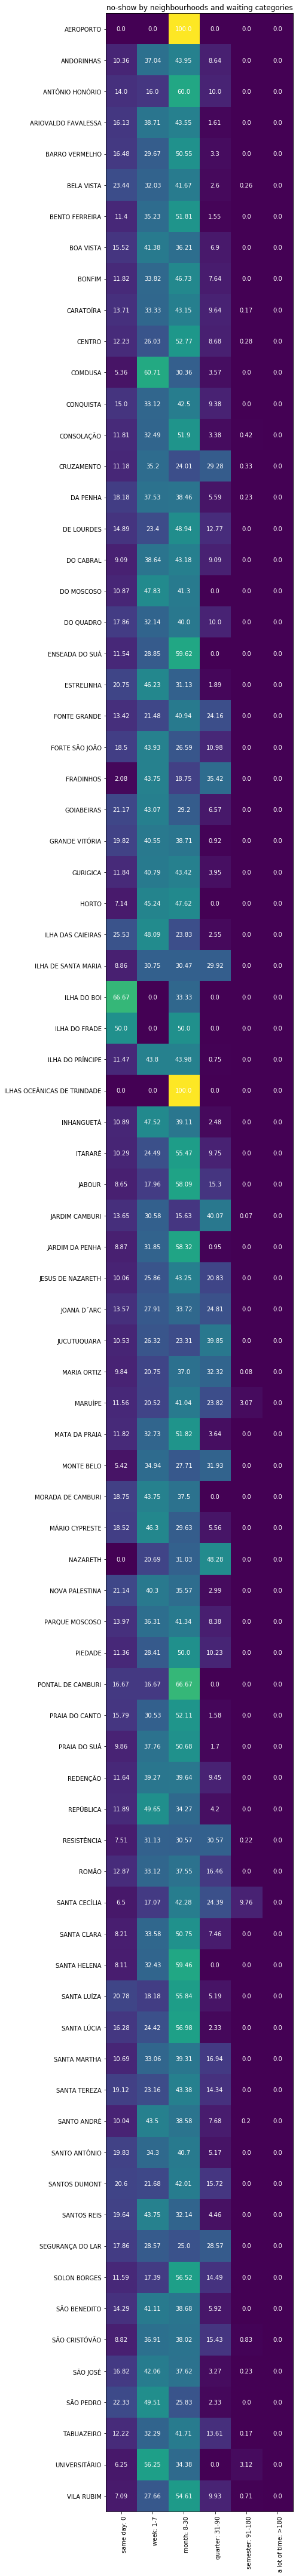

In [415]:
figure, axes = plt.subplots(figsize=(60, 60))

# plot the heatmap
axes.imshow(no_show_values_by_neighbourhood)

# show all the ticks
axes.set_xticks(np.arange(len(waiting_days_categories)))
axes.set_yticks(np.arange(len(neighbourhoods)))

# show all tick labels
axes.set_xticklabels(waiting_days_categories)
axes.set_yticklabels(neighbourhoods)

# Rotate the tick labels and set their alignment.
plt.setp(axes.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(neighbourhoods)):
   for j in range(len(waiting_days_categories)):
       axes.text(j, i, no_show_values_by_neighbourhood[i, j], ha="center", va="center", color="w")

axes.set_title("no-show by neighbourhoods and waiting categories")
figure.tight_layout()
plt.show()

- TODO

conclude neighbourhood analysis

### 3.7. Patient Id

In this section, we're digging up on patients that re-scheduled their appointments


TODO

- do the charts based on re-scheduling

### 3.8. Answering questions

- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?

...

- There are any relation on these variables that can lead us to a more specific group of patients?

...

- The day of the week of the appointment influences the patient no showing?

...

- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?

...

- There are patients no showing in appointments on the same day?

...


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [416]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255